# <center>Data Mining Project Code</center>

** **
## <center>*03 - Partitioning Methods Notebook*</center>

** **

In this notebook, we start our customer segmentation using two different partitioning methods: K-means and K-medoids. Each algorithm is going to be applied to different datasets which suffered from different transformations.

The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

1. [K-Means](#2.-K-Means) <br><br>


# 1. Importing Libraries & Data

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Clustering algorithms
from sklearn.cluster import KMeans

# Visualizations
import matplotlib.pyplot as plt

In [2]:
# change data file
data = pd.read_csv('data/data_capped.csv', index_col = "customer_id")
data.head(3)

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,20_23h,customer_region,last_promo,payment_method,promo_DELIVERY,promo_DISCOUNT,promo_FREEBIE,pay_CARD,pay_CASH,is_repeat_customer
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,18.0,2.0,5.0,1.0,0,1,0.00,0.00,0.0,0.0,...,0.0,2360,DELIVERY,DIGI,1,0,0,0,0,1
5d272b9dcb,17.0,2.0,2.0,2.0,0,1,12.82,6.39,0.0,0.0,...,0.0,8670,DISCOUNT,DIGI,0,1,0,0,0,1
f6d1b2ba63,38.0,1.0,2.0,2.0,0,1,9.20,0.00,0.0,0.0,...,0.0,4660,DISCOUNT,CASH,0,1,0,0,1,1


In [3]:
num_variables = ['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'days_between', 'total_orders',
       'avg_order_hour', 'total_spend', 'avg_spend_prod',
       '1_7h', '8_14h', '15_19h', '20_23h']

# 2. K-Means 

<a href="#top">Top &#129033;</a>

In [4]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data[num_variables])
    dispersion.append(kmeans.inertia_)

**Elbow Method**

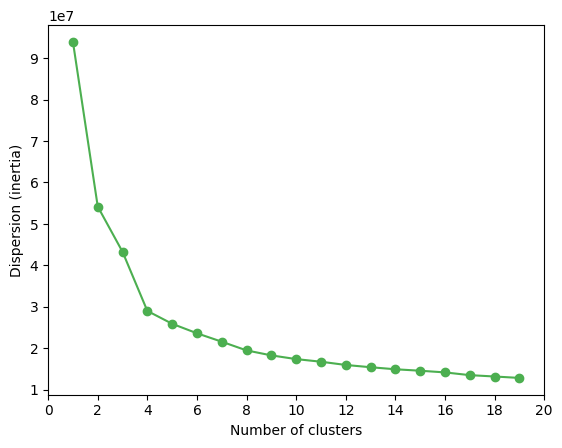

In [5]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

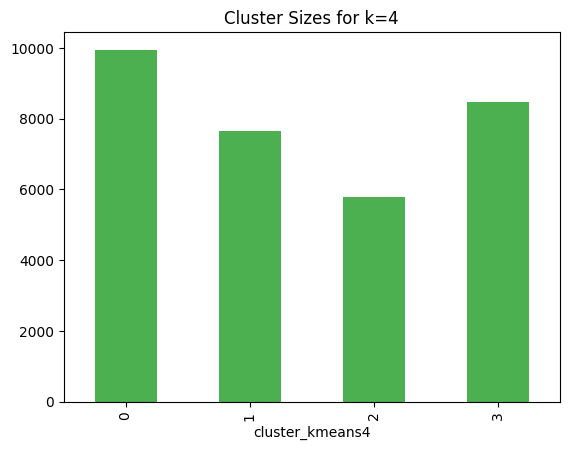

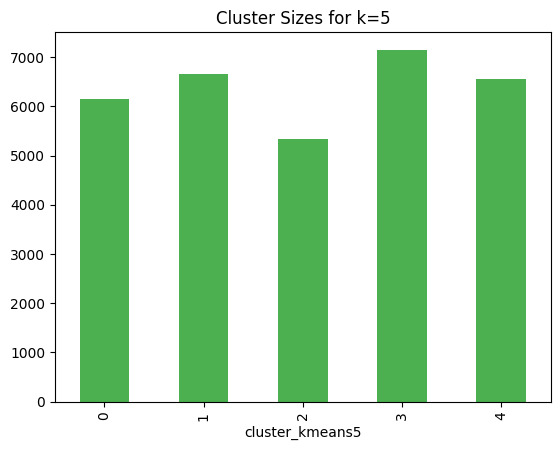

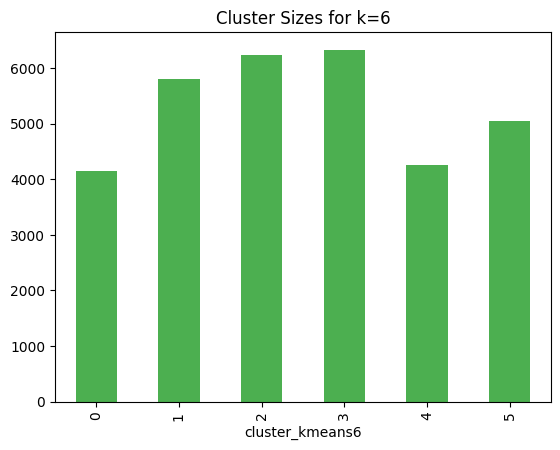

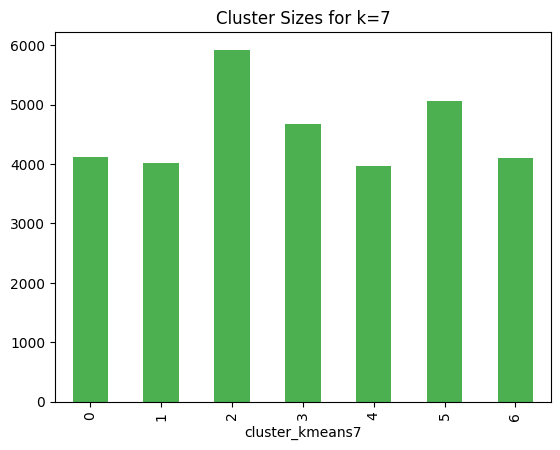

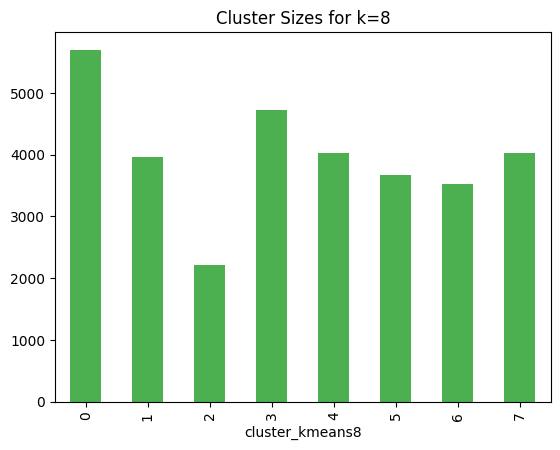

In [6]:
possible_k = [4, 5, 6, 7, 8]

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(data[num_variables])  
    clusters  = kmeans.predict(data[num_variables])  
    
    data[f'cluster_kmeans{k}'] = clusters 
    
    data.groupby([f'cluster_kmeans{k}']).size().plot(kind='bar', 
                                                          color='#4CAF50') 
    plt.title(f'Cluster Sizes for k={k}')
    plt.show()

In [7]:
for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(data[num_variables])  
    clusters  = kmeans.predict(data[num_variables])  
    
    data[f'cluster_kmeans{k}'] = clusters 
    
    print(f"Mean values for k={k}:")
    
    print(data[num_variables + [f'cluster_kmeans{k}']].groupby([f'cluster_kmeans{k}']).mean().T)
    

Mean values for k=4:
cluster_kmeans4                   0          1          2          3
customer_age              27.221295  27.167714  27.371024  27.335816
vendor_count               3.348582   1.692590   5.601228   1.727660
product_count              5.308466   2.444357  11.159665   2.537293
is_chain                   2.890006   1.281880   3.934993   1.203310
first_order               16.209431  19.246007  12.144364  61.988061
last_order                74.155842  28.916470  79.738243  71.721158
CUI_American               3.209778   1.972113   6.154530   1.898921
CUI_Asian                  4.569726   4.103657  15.563539   5.093898
CUI_Beverages              0.000000   0.000000   0.000000   0.000000
CUI_Cafe                   0.000000   0.000000   0.000000   0.000000
CUI_Chicken Dishes         0.000000   0.000000   0.000000   0.000000
CUI_Chinese                0.000000   0.000000   0.000000   0.000000
CUI_Desserts               0.000000   0.000000   0.000000   0.000000
CUI_Healthy  

In [8]:
# Não é criado antes no notebook velho
# kmeans_labels = kmeans.fit_predict(umap_embedding) 

In [9]:
# plot_dim_reduction(umap_embedding, targets = kmeans_labels,
#                    technique = 'K-Means visualised with UMAP')